In [1]:
# Imports
import os

# EOReader
from eoreader.reader import Reader
from eoreader.bands import YELLOW, Oa21, RED, SWIR_2, F1

# Declare the reader (only once)
reader = Reader()

In [2]:
# Create logger
import logging
from sertit import logs

logger = logging.getLogger("eoreader")
logs.init_logger(logger)

In [3]:
# First of all, let's focus on Sentinel-3 OLCI data
olci_path = os.path.join(
    "/home", "data", "DATA", "PRODS", "S3",
    "S3A_OL_1_EFR____20191215T105023_20191215T105323_20191216T153115_0179_052_322_2160_LN1_O_NT_002.zip"
)
olci_prod = reader.open(olci_path, remove_tmp=True)
olci_prod

eoreader.S3OlciProduct 'S3A_OL_1_EFR____20191215T105023_20191215T105323_20191216T153115_0179_052_322_2160_LN1_O_NT_002'
Attributes:
	condensed_name: 20191215T105023_S3_OLCI_EFR
	path: /home/data/DATA/PRODS/S3/S3A_OL_1_EFR____20191215T105023_20191215T105323_20191216T153115_0179_052_322_2160_LN1_O_NT_002.zip
	constellation: Sentinel-3 OLCI
	sensor type: Optical
	product type: OL_1_EFR___
	default pixel size: 300.0
	default resolution: None
	acquisition datetime: 2019-12-15T10:50:23.000506
	band mapping:
		COASTAL_AEROSOL: Oa03
		BLUE: Oa04
		GREEN: Oa06
		YELLOW: Oa07
		RED: Oa08
		VEGETATION_RED_EDGE_1: Oa11
		VEGETATION_RED_EDGE_2: Oa12
		VEGETATION_RED_EDGE_3: Oa16
		NIR: Oa17
		NARROW_NIR: Oa17
		WATER_VAPOUR: Oa20
		Oa01: Oa01
		Oa02: Oa02
		Oa09: Oa09
		Oa10: Oa10
		Oa13: Oa13
		Oa14: Oa14
		Oa15: Oa15
		Oa18: Oa18
		Oa19: Oa19
		Oa21: Oa21
		GREEN_I: Oa05
	needs extraction: False

In [4]:
# Get the bands information
olci_prod.bands

eoreader.SpectralBand 'Oa01'
Attributes:
	id: Oa01
	eoreader_name: Oa01
	common_name: 
	gsd (m): 300.0
	asset_role: reflectance
	Center wavelength (nm): 400.0
	Bandwidth (nm): 15.0
	description: Aerosol correction, improved water constituent retrieval
eoreader.SpectralBand 'Oa02'
Attributes:
	id: Oa02
	eoreader_name: Oa02
	common_name: 
	gsd (m): 300.0
	asset_role: reflectance
	Center wavelength (nm): 412.5
	Bandwidth (nm): 10.0
	description: Yellow substance and detrital pigments (turbidity)
eoreader.SpectralBand 'Oa03'
Attributes:
	id: Oa03
	eoreader_name: COASTAL_AEROSOL
	common_name: coastal
	gsd (m): 300.0
	asset_role: reflectance
	Center wavelength (nm): 442.5
	Bandwidth (nm): 10.0
	description: Chlorophyll absorption maximum, biogeochemistry, vegetation
eoreader.SpectralBand 'Oa04'
Attributes:
	id: Oa04
	eoreader_name: BLUE
	common_name: blue
	gsd (m): 300.0
	asset_role: reflectance
	Center wavelength (nm): 490.0
	Bandwidth (nm): 10.0
	description: High Chlorophyll
eoreader.Spec

In [5]:
# Load the Yellow band and the far NIR one
# Please note that mapped band need to be called by their mapped name and the specific one with their true name
olci_bands = olci_prod.load([YELLOW, Oa21])

2023-04-27 07:09:00,964 - [DEBUG] - Loading bands ['YELLOW', 'Oa21']


2023-04-27 07:09:01,357 - [DEBUG] - Converting YELLOW to reflectance


/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


2023-04-27 07:09:02,221 - [DEBUG] - Geocoding YELLOW


2023-04-27 07:09:09,622 - [DEBUG] - Converting Oa21 to reflectance


2023-04-27 07:09:10,261 - [DEBUG] - Geocoding Oa21


2023-04-27 07:09:17,408 - [DEBUG] - Read YELLOW


2023-04-27 07:09:17,433 - [DEBUG] - Manage nodata for band YELLOW


2023-04-27 07:09:17,438 - [DEBUG] - Converting YELLOW to reflectance


2023-04-27 07:09:18,188 - [DEBUG] - Read Oa21


2023-04-27 07:09:18,207 - [DEBUG] - Manage nodata for band Oa21


2023-04-27 07:09:18,213 - [DEBUG] - Converting Oa21 to reflectance


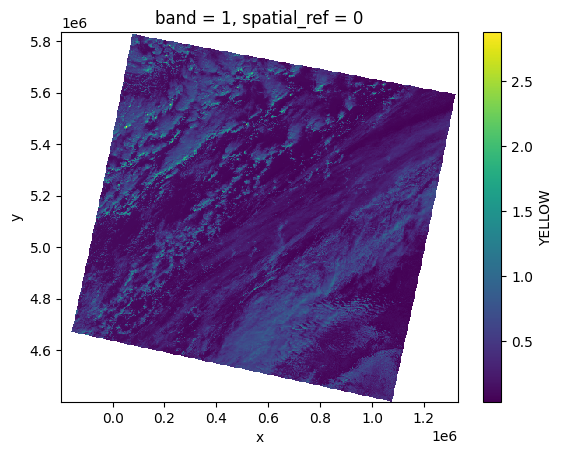

In [6]:
# Plot a subsampled version
olci_bands[YELLOW][:, ::10, ::10].plot()

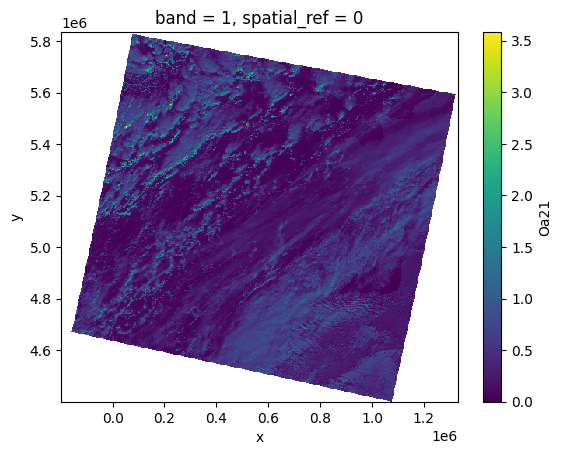

In [7]:
olci_bands[Oa21][:, ::10, ::10].plot()

In [8]:
# Other SLSTR imports
from eoreader.keywords import SLSTR_VIEW, SLSTR_STRIPE, SLSTR_RAD_ADJUST
from eoreader.products import SlstrRadAdjustTuple, SlstrRadAdjust, SlstrView, SlstrStripe

# Then, let's focus on Sentinel-3 SLSTR data (extracted here, but a zip would work)
slstr_path = os.path.join(
    "/home", "data", "DATA", "PRODS", "S3",
    "S3B_SL_1_RBT____20191115T233722_20191115T234022_20191117T031722_0179_032_144_3420_LN2_O_NT_003.SEN3"
)
slstr_prod = reader.open(slstr_path, remove_tmp=True)
slstr_prod

eoreader.S3SlstrProduct 'S3B_SL_1_RBT____20191115T233722_20191115T234022_20191117T031722_0179_032_144_3420_LN2_O_NT_003'
Attributes:
	condensed_name: 20191115T233722_S3_SLSTR_RBT
	path: /home/data/DATA/PRODS/S3/S3B_SL_1_RBT____20191115T233722_20191115T234022_20191117T031722_0179_032_144_3420_LN2_O_NT_003.SEN3
	constellation: Sentinel-3 SLSTR
	sensor type: Optical
	product type: SL_1_RBT___
	default pixel size: 500.0
	default resolution: None
	acquisition datetime: 2019-11-15T23:37:22.254773
	band mapping:
		GREEN: S1
		RED: S2
		NIR: S3
		NARROW_NIR: S3
		CIRRUS: S4
		SWIR_1: S5
		SWIR_2: S6
		THERMAL_IR_1: S8
		THERMAL_IR_2: S9
		S7: S7
		F1: F1
		F2: F2
	needs extraction: False

In [9]:
# Get the bands information
slstr_prod.bands

eoreader.SpectralBand 'F1'
Attributes:
	id: F1
	eoreader_name: F1
	common_name: 
	gsd (m): 1000.0
	asset_role: brightness_temperature
	Center wavelength (nm): 3742.0
	Bandwidth (nm): 398.0
	description: Active fire, brightness temperature, 1km
eoreader.SpectralBand 'F2'
Attributes:
	id: F2
	eoreader_name: F2
	common_name: 
	gsd (m): 1000.0
	asset_role: brightness_temperature
	Center wavelength (nm): 10854.0
	Bandwidth (nm): 776.0
	description: Active fire, brightness temperature, 1km
eoreader.SpectralBand 'S1'
Attributes:
	id: S1
	eoreader_name: GREEN
	common_name: green
	gsd (m): 500.0
	asset_role: reflectance
	Center wavelength (nm): 554.2700000000001
	Bandwidth (nm): 19.259999999999998
	description: Cloud screening, vegetation monitoring, aerosol
eoreader.SpectralBand 'S2'
Attributes:
	id: S2
	eoreader_name: RED
	common_name: red
	gsd (m): 500.0
	asset_role: reflectance
	Center wavelength (nm): 659.47
	Bandwidth (nm): 19.25
	description: NDVI, vegetation monitoring, aerosol
eoreader

In [10]:
# Same remark for mapped and specific band than above
# Not that native radiance band are converted into reflectance, whereas brilliance temperature bands are not

# Load bands with nadir view and stripe B
# (for bands that have a stripe B, the other will load their unique stripe, namely A or I)
# RED: only stripe A
# SWIR_2: has strip 1, B and TDI (c)
# F1: has only stripe I
slstr_bn_bands = slstr_prod.load([RED, SWIR_2, F1], slstr_view="n", slstr_stripe="b")
slstr_bn_bands_2 = slstr_prod.load([RED, SWIR_2, F1], **{SLSTR_VIEW: SlstrView.NADIR, SLSTR_STRIPE: SlstrStripe.B})

2023-04-27 07:09:21,788 - [DEBUG] - Loading bands ['RED', 'SWIR_2', 'F1']


2023-04-27 07:09:21,936 - [DEBUG] - Converting RED to reflectance


2023-04-27 07:09:25,669 - [DEBUG] - Geocoding RED


2023-04-27 07:09:30,364 - [DEBUG] - Converting SWIR_2 to reflectance


2023-04-27 07:09:34,226 - [DEBUG] - Geocoding SWIR_2


2023-04-27 07:09:38,674 - [DEBUG] - Geocoding F1


2023-04-27 07:09:42,371 - [DEBUG] - Read RED


2023-04-27 07:09:42,390 - [DEBUG] - Manage nodata for band RED


2023-04-27 07:09:42,394 - [DEBUG] - Converting RED to reflectance


2023-04-27 07:09:42,773 - [DEBUG] - Read SWIR_2


2023-04-27 07:09:42,793 - [DEBUG] - Manage nodata for band SWIR_2


2023-04-27 07:09:42,798 - [DEBUG] - Converting SWIR_2 to reflectance


2023-04-27 07:09:43,180 - [DEBUG] - Read F1


2023-04-27 07:09:43,198 - [DEBUG] - Manage nodata for band F1


2023-04-27 07:09:43,203 - [DEBUG] - Converting F1 to reflectance


2023-04-27 07:09:44,506 - [DEBUG] - Loading bands ['RED', 'SWIR_2', 'F1']


2023-04-27 07:09:44,507 - [DEBUG] - Read RED


2023-04-27 07:09:44,526 - [DEBUG] - Manage nodata for band RED


2023-04-27 07:09:44,531 - [DEBUG] - Converting RED to reflectance


2023-04-27 07:09:44,929 - [DEBUG] - Read SWIR_2


2023-04-27 07:09:44,947 - [DEBUG] - Manage nodata for band SWIR_2


2023-04-27 07:09:44,952 - [DEBUG] - Converting SWIR_2 to reflectance


2023-04-27 07:09:45,354 - [DEBUG] - Read F1


2023-04-27 07:09:45,374 - [DEBUG] - Manage nodata for band F1


2023-04-27 07:09:45,379 - [DEBUG] - Converting F1 to reflectance


In [11]:
# You can use the keywords by importing them or copy their value.
# Their values can be passed as strings or as an Enum
# However, it seems safer to import the keywords and use the enum
# The result should be the same

# Please bear in mind that oblique and nadir views are not stackable !
# However, you can stack different stripes
# (but you cannot load them at once and you should collocate them to be sure, their reprojection grid may vary as their GCP vary)

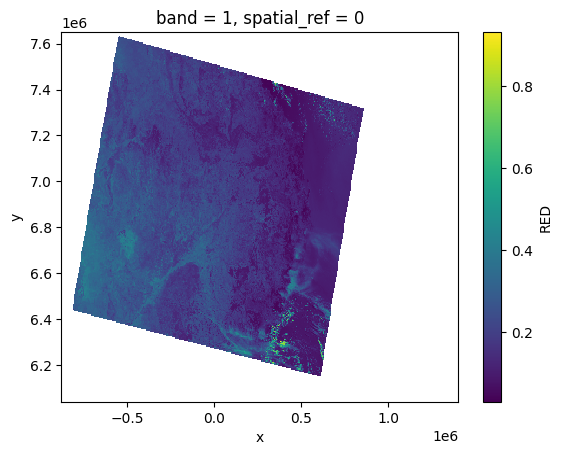

In [12]:
# Plot a subsampled version
slstr_bn_bands[RED][:, ::10, ::10].plot()

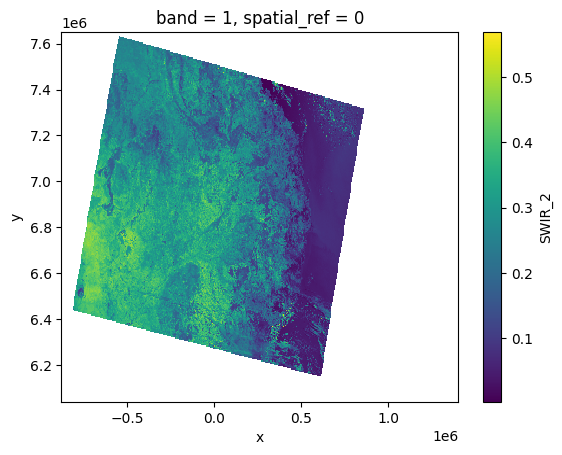

In [13]:
slstr_bn_bands[SWIR_2][:, ::10, ::10].plot()

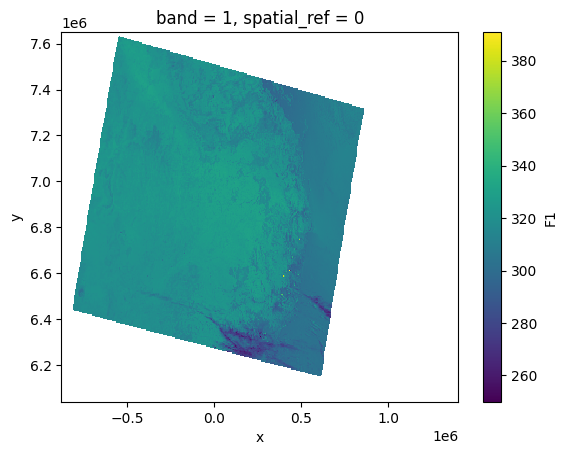

In [14]:
slstr_bn_bands[F1][:, ::10, ::10].plot()

In [15]:
# Sentinel-3 SLSTR radiance is not nominal, so EUMETSAT advises the user to make some radiance adjustments
# As stated here: https://www-cdn.eumetsat.int/files/2021-05/S3.PN-SLSTR-L1.08%20-%20i1r0%20-%20SLSTR%20L1%20PB%202.75-A%20and%201.53-B.pdf
# These coefficients have been added since the 06 version and several sets exist:

# The last one (S3.PN-SLSTR-L1.08, since 18/05/2021) which is also the default one
SlstrRadAdjust.S3_PN_SLSTR_L1_08

<SlstrRadAdjust.S3_PN_SLSTR_L1_08: SlstrRadAdjustTuple(S1_n=0.97, S2_n=0.98, S3_n=0.98, S4_n=1.0, S5_n=1.11, S6_n=1.13, S1_o=0.94, S2_o=0.95, S3_o=0.95, S4_o=1.0, S5_o=1.04, S6_o=1.07)>

In [16]:
# The two older sets given by EUMETSAT are the same
assert SlstrRadAdjust.S3_PN_SLSTR_L1_07 == SlstrRadAdjust.S3_PN_SLSTR_L1_06
SlstrRadAdjust.S3_PN_SLSTR_L1_07


<SlstrRadAdjust.S3_PN_SLSTR_L1_06: SlstrRadAdjustTuple(S1_n=1.0, S2_n=1.0, S3_n=1.0, S4_n=1.0, S5_n=1.12, S6_n=1.15, S1_o=1.0, S2_o=1.0, S3_o=1.0, S4_o=1.0, S5_o=1.2, S6_o=1.26)>

In [17]:
# Moreover, SNAP uses a different set with unknown origin (optional, in S3MPC Calibration)
SlstrRadAdjust.SNAP

<SlstrRadAdjust.SNAP: SlstrRadAdjustTuple(S1_n=1.0, S2_n=1.0, S3_n=1.0, S4_n=1.0, S5_n=1.12, S6_n=1.13, S1_o=1.0, S2_o=1.0, S3_o=1.0, S4_o=1.0, S5_o=1.15, S6_o=1.14)>

In [18]:
# A default set also exists, with every coefficient set to 1.0
SlstrRadAdjust.NONE

<SlstrRadAdjust.NONE: SlstrRadAdjustTuple(S1_n=1.0, S2_n=1.0, S3_n=1.0, S4_n=1.0, S5_n=1.0, S6_n=1.0, S1_o=1.0, S2_o=1.0, S3_o=1.0, S4_o=1.0, S5_o=1.0, S6_o=1.0)>

2023-04-27 07:09:47,792 - [DEBUG] - Loading bands ['RED']


2023-04-27 07:09:47,930 - [DEBUG] - Converting RED to reflectance


2023-04-27 07:09:51,654 - [DEBUG] - Geocoding RED


2023-04-27 07:09:55,868 - [DEBUG] - Read RED


2023-04-27 07:09:55,886 - [DEBUG] - Manage nodata for band RED


2023-04-27 07:09:55,891 - [DEBUG] - Converting RED to reflectance


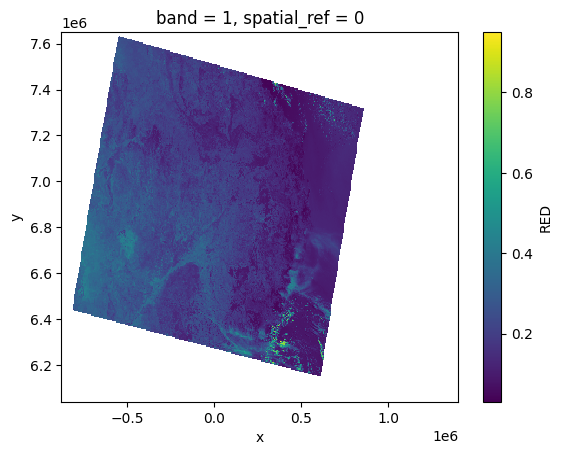

In [19]:
# You can use your own set by creating one.
# All the coefficients are set to 1.0 by default, so just modify the one you want
# The band keywords are {true_name}_{view_letter}
# RED is S2
user_set = SlstrRadAdjustTuple(S1_n=1.15, S2_o=1.12)

# However please bear in mind that if you want to reload the same band with a different adjustment, 
# you have to remove the temporary process folder or the previous band will be reloaded.
slstr_prod.clean_tmp()

# To apply these sets when loading a band, just add the keyword when loading it
red_pn_08 = slstr_bn_bands[RED]
slstr_red_bn = slstr_prod.load(
    RED,
    **{
        SLSTR_VIEW: SlstrView.NADIR,
        SLSTR_STRIPE: SlstrStripe.B,
        SLSTR_RAD_ADJUST: user_set
    }
)
red_user = slstr_red_bn[RED]
red_user[:, ::10, ::10].plot()

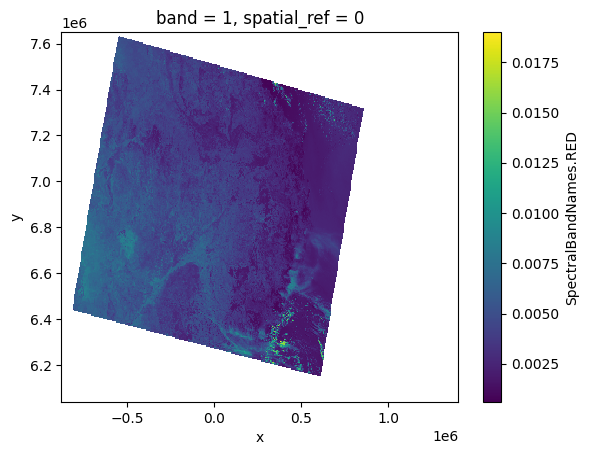

In [20]:
# We may need to collocate the bands if we want to work on two sets loaded apart
# Indeed, in EOReader, the bands are collocated when loaded together

# For example, if we wanted to work on the SWIR or F1 band, 
# as we first loaded them with the RED, they are collocated to this band (the first one) 
# Yet, their geodetic grid are different from the RED one (in and bn are slightly different than the an)
# So if we load on a second time only the SWIR or the F1 band, their are chances that the geocoding might be a little different
# The it is best to collocate the two bands just to be sure they will always match (and have the same size)

# To do so you could do:
from sertit import rasters

red_user = rasters.collocate(red_pn_08, other=red_user)

# Here, it is useless as we work on the master band
abs(red_pn_08 - red_user)[:, ::10, ::10].plot()